# Question
Does the number of emergency calls increase during a planetary alignment?
Mercury in retrograde has a reputation for bringing chaos and confusion. It occurs when an optical illusion makes the the planet appear to be moving in the opposite direction that it usually does. In New Age Spiritualism it is supposedly responsible for increased stressm anger, resentment, or sadness. 

## Hypothesis
During periods of Mercury retrograde, there will be a statistically significant increase in the number of 911 dispatches compared to non-retrograde periods.

This hypothesis is grounded in the following observations:

-   Mercury retrograde is associated with communication issues and misunderstandings [1](https://www.jessicaadams.com/2017/12/10/blog/mercury-retrograde-what-does-it-mean/)  [4](https://timesofindia.indiatimes.com/astrology/planets-transits/understanding-mercury-retrograde-and-how-it-affects-us/articleshow/109243613.cms).

-   It often coincides with technological malfunctions and disruptions [3](https://nowandgen.com/2018/07/31/mercury-retrograde-susan-millers-tips-on-how-to-deal/).

-   There's an increased likelihood of accidents and mishaps during this period [3](https://nowandgen.com/2018/07/31/mercury-retrograde-susan-millers-tips-on-how-to-deal/)  [4](https://timesofindia.indiatimes.com/astrology/planets-transits/understanding-mercury-retrograde-and-how-it-affects-us/articleshow/109243613.cms).

## Conclusion
Result: The correlation between incident count and retrograde periods is 0.0411. This means that there is virtually no linear relationship between the number of incidents and Mercury retrograde periods. Further analysis into annual data confirms these findings. 

### Import Data and Dependencies

In [123]:
import pandas as pd
import databuilder
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

db = databuilder.DataBuilder()

Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 61


In [124]:
# Load the emergency dataset into Pandas dataframe and display first five rows
emergency_df = db.get_emergency_data()
display(emergency_df.head())

# Load the mercury dataset into Pandas dataframe and display first five rows
mercury_df = db.get_mercury_data()
display(mercury_df.head())

# Load planet_align dataset into Pandas dataframe and display first five rows
planet_align_df = pd.read_csv("./Resources/planet_align.csv")
display(planet_align_df.head())

,INCIDENT,REPORTED,CLOSED,CATEGORY
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS


,year,start_date,end_date
0,2019,2019-03-05,2019-03-28
1,2019,2019-07-07,2019-08-01
2,2019,2019-10-31,2019-11-20
3,2020,2020-02-16,2020-03-09
4,2020,2020-06-17,2020-07-11


,event,start_date,end_date
0,Jupiter Saturn Mars Triangle,2020-07-01,2020-07-31
1,Great Conjunction,2020-12-21,2020-12-21
2,Four Planet Alignment,2022-04-01,2022-05-31
3,Five Planet Alignment,2022-06-01,2022-06-30


# Analysis
## emergency_df | General

In [125]:
emergency_df['REPORTED_DATE'] = emergency_df['REPORTED'].dt.date
emergency_df_grouped = emergency_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_df_grouped['REPORTED_DATE'])

print(len(emergency_df_grouped))
display(emergency_df_grouped.head())

1826


,REPORTED_DATE,COUNT
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


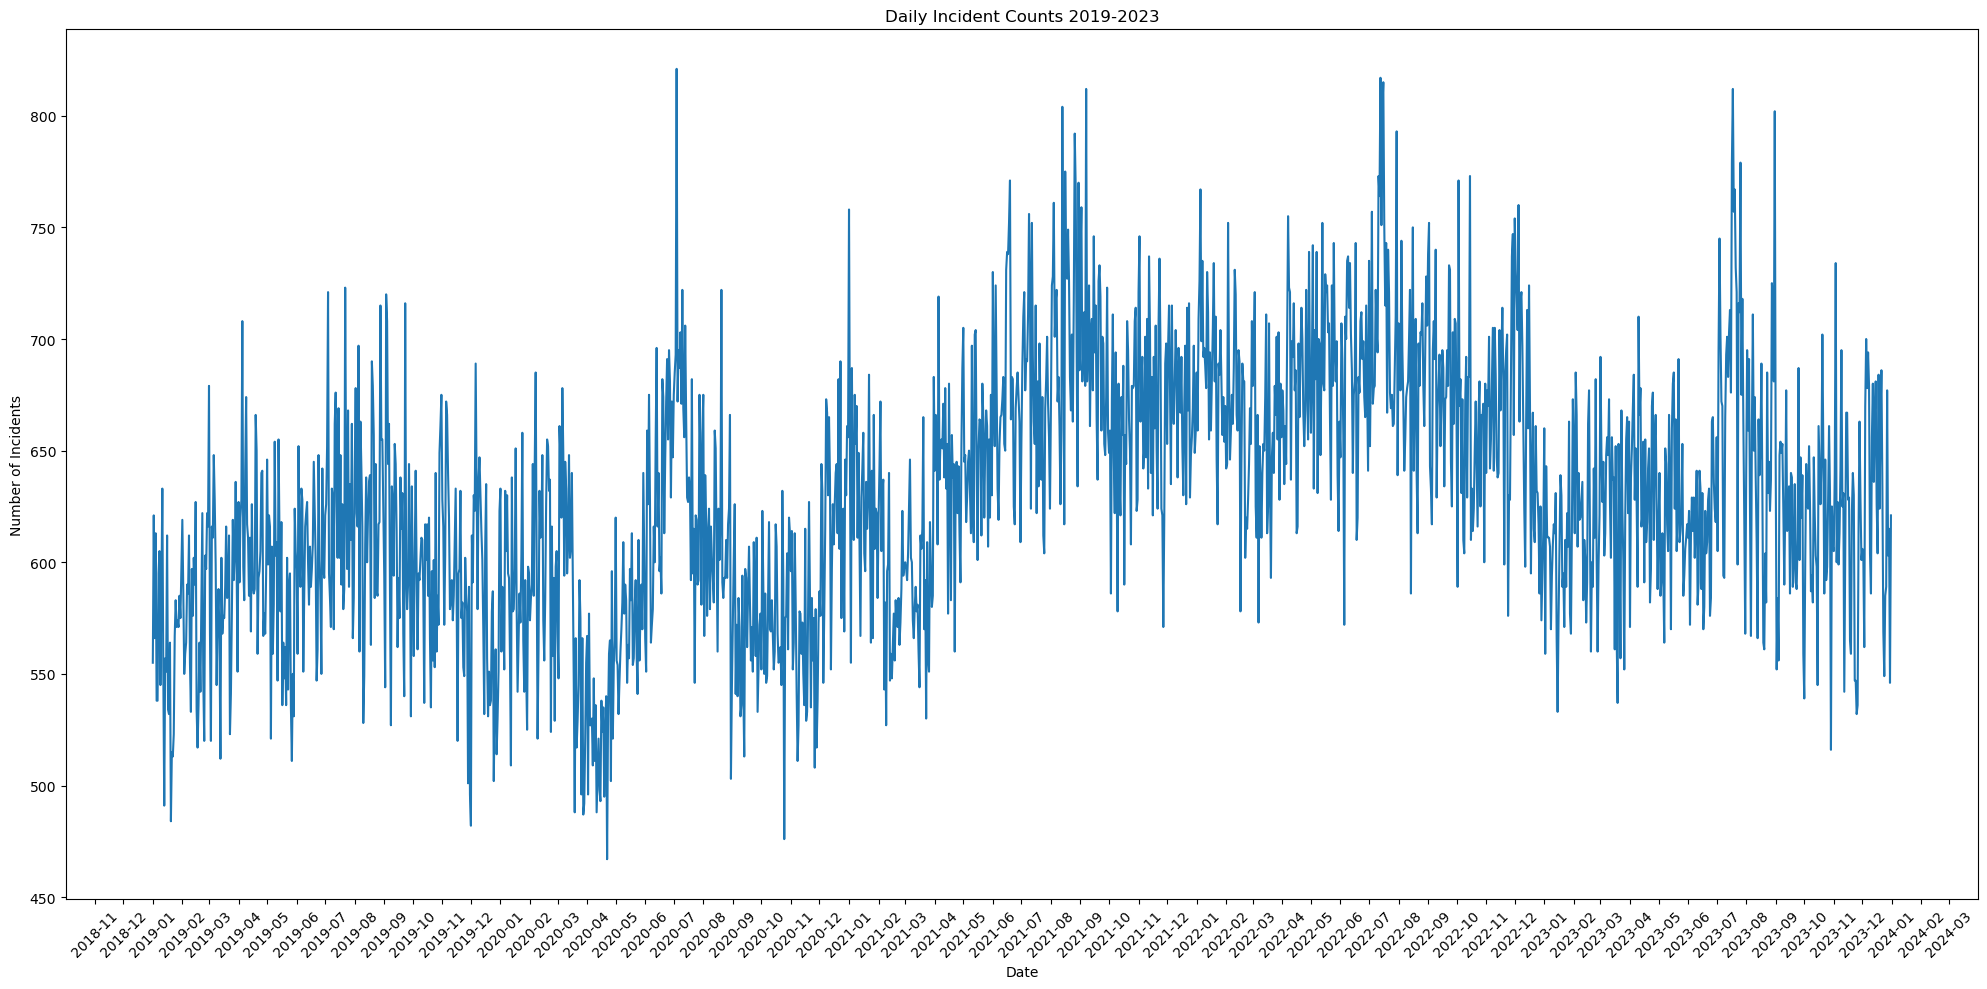

In [126]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
ax.plot(emergency_df_grouped['REPORTED_DATE'], emergency_df_grouped['COUNT'])

# Customize the plot
plt.title('Daily Incident Counts 2019-2023')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## mercury_df | General

In [127]:
print(len(mercury_df))
print(mercury_df.columns)
print(mercury_df.dtypes)


16
Index(['year', 'start_date', 'end_date'], dtype='object')
year                   int64
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object


In [128]:
#checks if a given date falls within any of the specified date ranges
def is_in_range(date, ranges):
    return any((start <= date <= end for start, end in ranges))

In [129]:
#creates a list of tuples, where each tuple contains a start date and end date, representing the date ranges for Mercury retrograde periods.
date_ranges = list(zip(mercury_df['start_date'], mercury_df['end_date']))
print(len(date_ranges))

16


## planet_df | General

In [130]:
#change start_date and end_date to date time
planet_align_df['start_date'] = pd.to_datetime(planet_align_df['start_date'])
planet_align_df['end_date'] = pd.to_datetime(planet_align_df['end_date'])

planet_date_ranges = list(zip(planet_align_df['start_date'], planet_align_df['end_date']))
display(planet_align_df.columns)
display(planet_align_df.dtypes)

Index(['event', 'start_date', 'end_date'], dtype='object')

event                 object
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

## Mercury Retrograde | General Analysis

In [131]:
emergency_df_grouped['in_range'] = emergency_df_grouped['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

Average COUNT within date ranges: 634.679347826087
Average COUNT outside date ranges: 628.7853223593964
Percentage Difference: 0.94%

Monthly averages:
month
2019-01    562.741935
2019-02    576.785714
2019-03    587.258065
2019-04    610.300000
2019-05    582.548387
2019-06    601.300000
2019-07    623.838710
2019-08    626.709677
2019-09    612.133333
2019-10    595.806452
2019-11    590.433333
2019-12    580.935484
2020-01    585.645161
2020-02    601.137931
2020-03    581.064516
2020-04    528.233333
2020-05    576.419355
2020-06    632.800000
2020-07    653.451613
2020-08    607.806452
2020-09    570.800000
2020-10    576.032258
2020-11    563.500000
2020-12    623.161290
2021-01    629.129032
2021-02    589.071429
2021-03    593.806452
2021-04    640.800000
2021-05    647.935484
2021-06    677.733333
2021-07    676.032258
2021-08    708.000000
2021-09    699.233333
2021-10    656.161290
2021-11    672.166667
2021-12    672.677419
2022-01    689.451613
2022-02    665.107143
2022-0

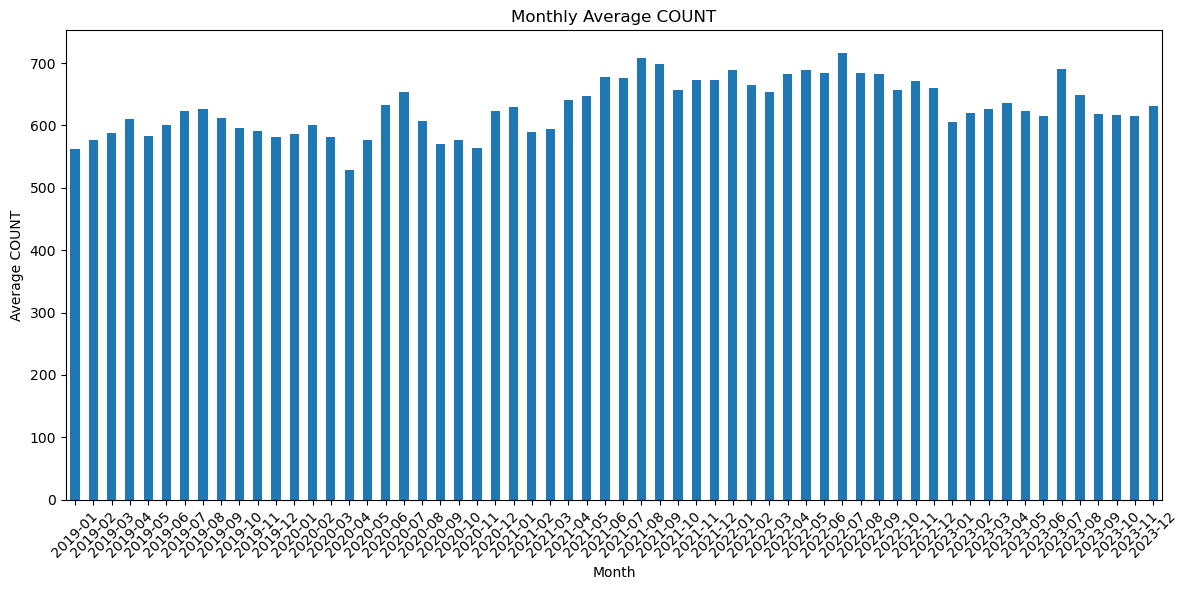

In [132]:
# Calculate average COUNT for dates within ranges and outside ranges
avg_in_range = emergency_df_grouped[emergency_df_grouped['in_range']]['COUNT'].mean()
avg_out_range = emergency_df_grouped[~emergency_df_grouped['in_range']]['COUNT'].mean()

print(f"Average COUNT within date ranges: {avg_in_range}")
print(f"Average COUNT outside date ranges: {avg_out_range}")
#print percentage difference
print(f"Percentage Difference: {((avg_in_range - avg_out_range) / avg_out_range) * 100:.2f}%")

# Group by month and calculate average COUNT
emergency_df_grouped['month'] = emergency_df_grouped['REPORTED_DATE'].dt.to_period('M')
monthly_avg = emergency_df_grouped.groupby('month')['COUNT'].mean()

print("\nMonthly averages:")
print(monthly_avg)

# Plot monthly averages
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average COUNT')
plt.xlabel('Month')
plt.ylabel('Average COUNT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Mercury Retrograde | Overview

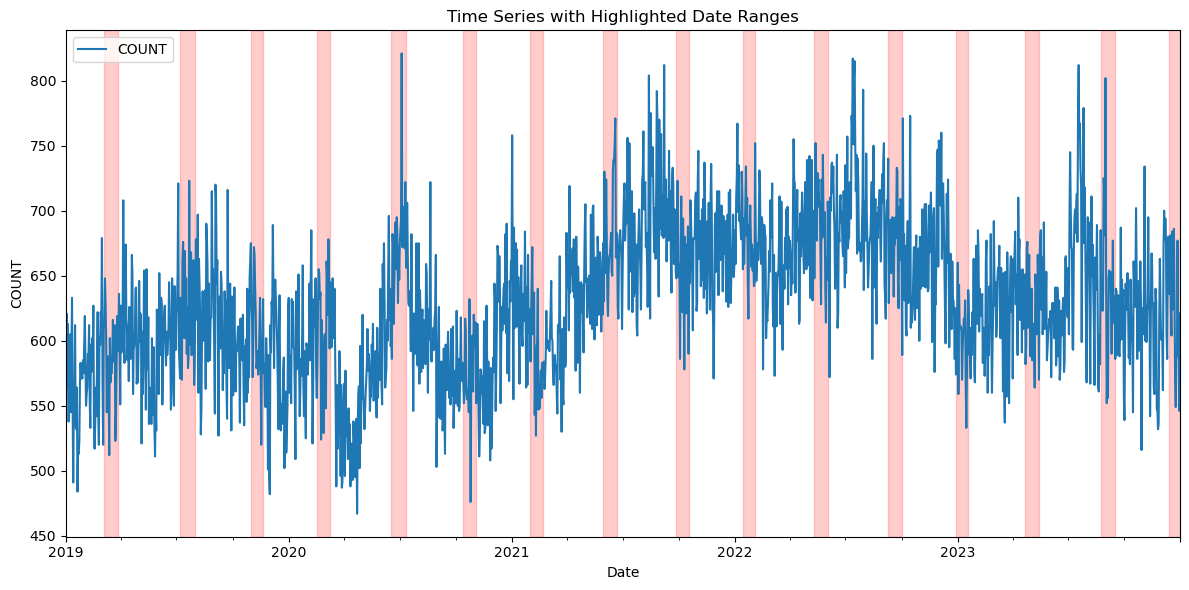

In [133]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the entire time series
emergency_df_grouped.plot(x='REPORTED_DATE', y='COUNT', ax=ax, label='COUNT')

# Highlight the date ranges
for start, end in date_ranges:
    ax.axvspan(start, end, alpha=0.2, color='red')


# Customize the plot
plt.title('Time Series with Highlighted Date Ranges')
plt.xlabel('Date')
plt.ylabel('COUNT')
plt.legend()
plt.tight_layout()
plt.show()

### Mercury Retrograde with Planetary Alignment Events | Overview
*Added out of curiosity if any planetary events have an impact

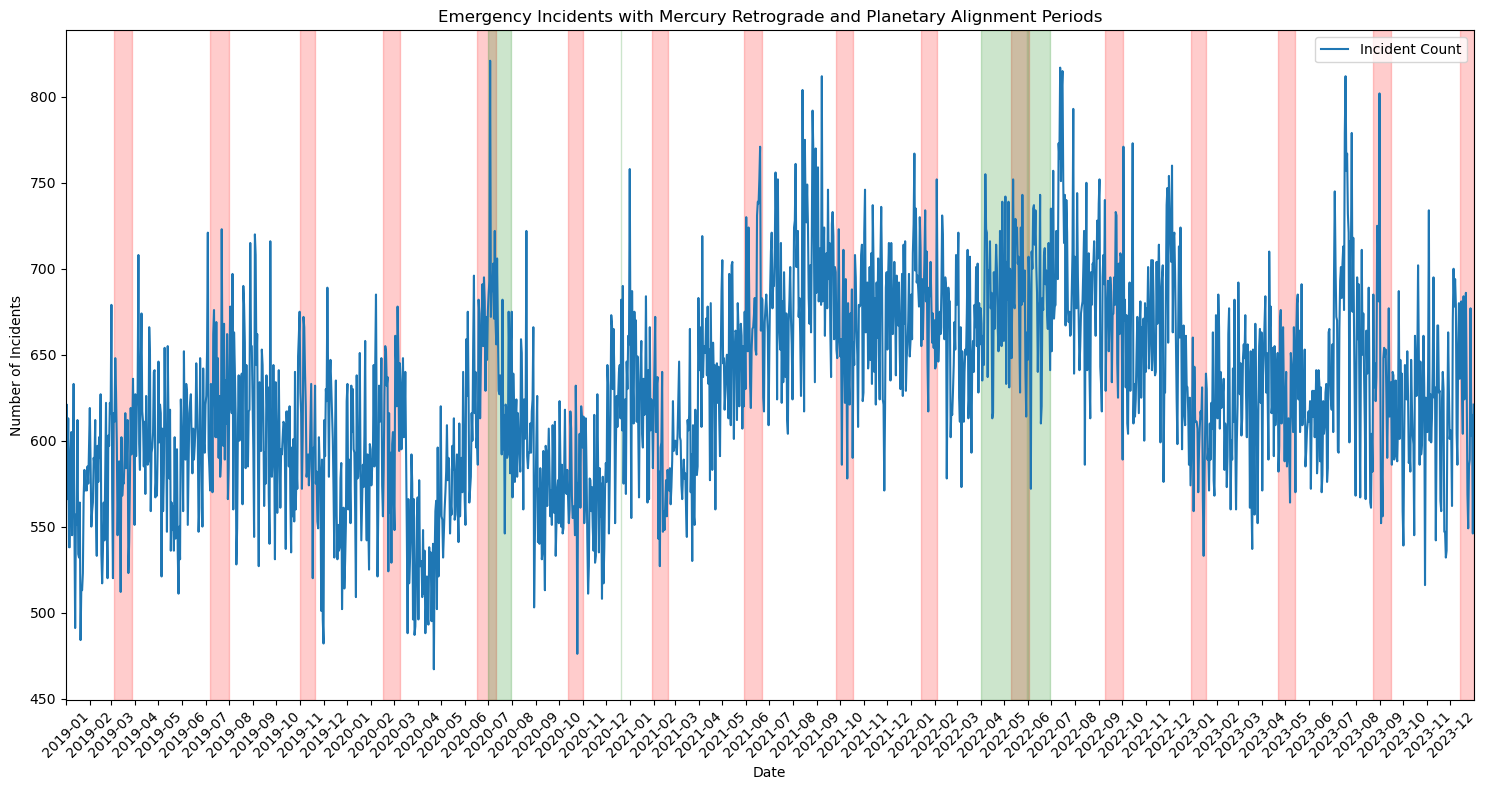

In [134]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the entire time series
emergency_df_grouped.plot(x='REPORTED_DATE', y='COUNT', ax=ax, label='Incident Count')

# Highlight Mercury retrograde periods in red
for start, end in date_ranges:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.2, color='red')

# Highlight planetary alignment periods in green
for start, end in planet_date_ranges:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.2, color='green')


# Customize the plot
plt.title('Emergency Incidents with Mercury Retrograde and Planetary Alignment Periods')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
ax.legend()

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Mercury Retrograde | Correlation
Result: No correlation (0.0411)

In [135]:
# Load the Mercury retrograde data
mercury_df['start_date'] = pd.to_datetime(mercury_df['start_date'])
mercury_df['end_date'] = pd.to_datetime(mercury_df['end_date'])

# Load the emergency incidents data
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])

# Function to check if a date is within Mercury retrograde
def is_retrograde(date):
    return any((start <= date <= end for start, end in zip(mercury_df['start_date'], mercury_df['end_date'])))

# Group the emergency data by date and count incidents
daily_incidents = emergency_df.groupby(emergency_df['REPORTED'].dt.date).size().reset_index(name='incident_count')
daily_incidents['REPORTED'] = pd.to_datetime(daily_incidents['REPORTED'])
daily_incidents['is_retrograde'] = daily_incidents['REPORTED'].apply(is_retrograde)

# Create a binary column for retrograde periods
daily_incidents['retrograde'] = daily_incidents['is_retrograde'].astype(int)

# Calculate the correlation
correlation = daily_incidents[['incident_count', 'retrograde']].corr()

print(f"Correlation between incident count and retrograde periods: {correlation.iloc[0, 1]:.4f}")

Correlation between incident count and retrograde periods: 0.0411


### Mercury Retrograde | In vs Out of Range

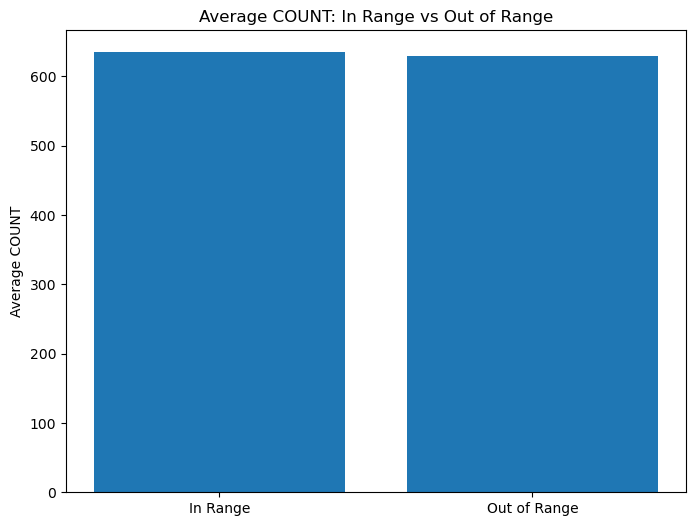

In [136]:
labels = ['In Range', 'Out of Range']
averages = [avg_in_range, avg_out_range]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages)
plt.title('Average COUNT: In Range vs Out of Range')
plt.ylabel('Average COUNT')
plt.show()

## Mercury Retrograde | By Category
Needs work

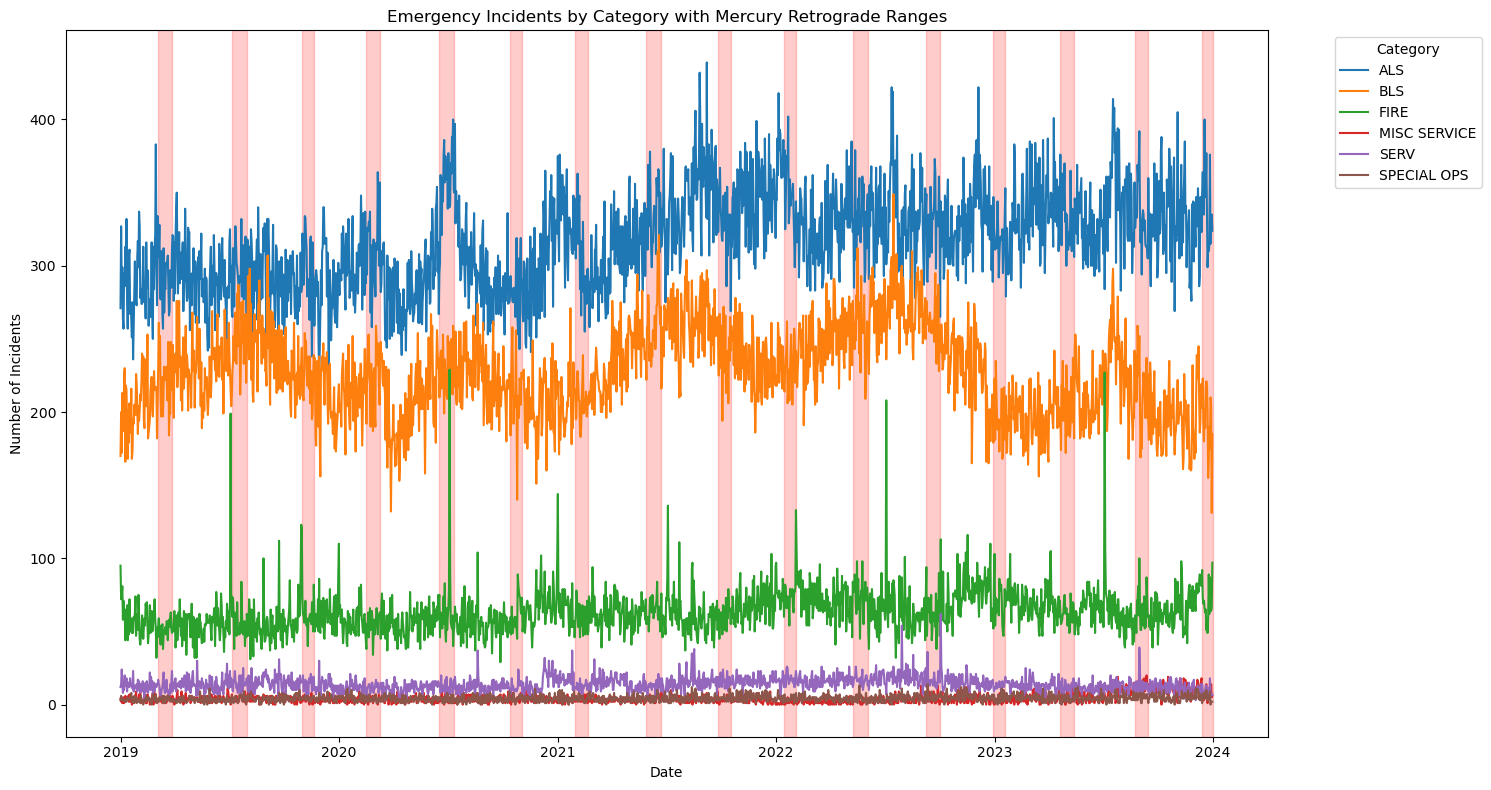

In [137]:
# Group by date and category, then count incidents
grouped_data = emergency_df.groupby([emergency_df['REPORTED'].dt.date, 'CATEGORY']).size().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
grouped_data.plot(ax=ax)

# Highlight the date ranges
for start, end in date_ranges:
    ax.axvspan(start, end, alpha=0.2, color='red')

plt.title('Emergency Incidents by Category with Mercury Retrograde Ranges')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Drill Down Analysis
### Correlation Analysis

In [138]:
def analyze_retrograde_correlation_by_year(start_year, end_year):
    results = {}

    for year in range(start_year, end_year + 1):
        # Filter Mercury retrograde data for the specific year
        mercury_df_filtered = mercury_df[
            ((mercury_df['start_date'].dt.year == year) | (mercury_df['end_date'].dt.year == year))
        ]

        # Filter emergency data for the specific year
        emergency_df_filtered = emergency_df[emergency_df['REPORTED'].dt.year == year]

        # Function to check if a date is within Mercury retrograde
        def is_retrograde(date):
            return any((start <= date <= end for start, end in zip(mercury_df_filtered['start_date'], mercury_df_filtered['end_date'])))

        # Group the emergency data by date and count incidents
        daily_incidents = emergency_df_filtered.groupby(emergency_df_filtered['REPORTED'].dt.date).size().reset_index(name='incident_count')
        daily_incidents['REPORTED'] = pd.to_datetime(daily_incidents['REPORTED'])
        daily_incidents['is_retrograde'] = daily_incidents['REPORTED'].apply(is_retrograde)

        # Create a binary column for retrograde periods
        daily_incidents['retrograde'] = daily_incidents['is_retrograde'].astype(int)

        # Calculate the correlation
        correlation = daily_incidents[['incident_count', 'retrograde']].corr().iloc[0, 1]

        results[year] = {
            'correlation': correlation,
            'data': daily_incidents
        }

        print(f"Correlation for {year}: {correlation:.4f}")

    return results

# Run the analysis for years 2019 to 2023
results = analyze_retrograde_correlation_by_year(2019, 2023)

Correlation for 2019: 0.1084
Correlation for 2020: 0.2956
Correlation for 2021: -0.1126
Correlation for 2022: -0.0041
Correlation for 2023: -0.0508


### Yearly Analysis

In [139]:
def analyze_incidents_by_year(year, emergency_df, date_ranges):
    """
        Analyze emergency incident data for a specified year and generate visualizations.

        This function calculates average incident counts during and outside Mercury retrograde 
        periods, and creates three plots: a time series of daily incidents, monthly averages, 
        and incidents by category. It also highlights Mercury retrograde periods in the plots.

        Args:
            year (int): The year to analyze.
            emergency_df (pandas.DataFrame): DataFrame containing emergency incident data.
            date_ranges (list of tuples): List of (start_date, end_date) tuples for Mercury retrograde periods.

        Returns:
            tuple: A tuple containing:
                - avg_in_range (float): Average incident count during retrograde periods.
                - avg_out_range (float): Average incident count outside retrograde periods.
                - monthly_avg (pandas.Series): Monthly average incident counts.

        Prints:
            Prints average counts, percentage difference, and monthly averages.

        Displays:
            Three matplotlib plots showing incident data and retrograde periods.
        """
    # Ensure REPORTED and REPORTED_DATE are datetime
    emergency_df['REPORTED_DATE'] = pd.to_datetime(emergency_df['REPORTED'].dt.date)

    # Filter for the specified year
    emergency_df_year = emergency_df[emergency_df['REPORTED'].dt.year == year].copy()

    # Ensure date_ranges are Timestamps
    date_ranges = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in date_ranges]

    # Function to check if a date is within any of the ranges
    def is_in_range(date, ranges):
        return any(start <= date <= end for start, end in ranges)

    # Apply the function
    emergency_df_year.loc[:, 'in_range'] = emergency_df_year['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

    # Group by date and calculate COUNT
    emergency_df_year_grouped = emergency_df_year.groupby('REPORTED_DATE').size().reset_index(name='COUNT')
    emergency_df_year_grouped['in_range'] = emergency_df_year_grouped['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

    # Calculate averages
    avg_in_range = emergency_df_year_grouped[emergency_df_year_grouped['in_range']]['COUNT'].mean()
    avg_out_range = emergency_df_year_grouped[~emergency_df_year_grouped['in_range']]['COUNT'].mean()

    print(f"Year {year}:")
    print(f"Average COUNT within date ranges: {avg_in_range:.2f}")
    print(f"Average COUNT outside date ranges: {avg_out_range:.2f}")

    # Monthly averages
    emergency_df_year_grouped['month'] = emergency_df_year_grouped['REPORTED_DATE'].dt.to_period('M')
    monthly_avg = emergency_df_year_grouped.groupby('month')['COUNT'].mean()
    print(f"Percentage Difference: {((avg_in_range - avg_out_range) / avg_out_range) * 100:.2f}%")

    print("\nMonthly averages:")
    print(monthly_avg)

    # Plotting incidents over time
    fig, ax = plt.subplots(figsize=(12, 6))
    emergency_df_year_grouped.plot(x='REPORTED_DATE', y='COUNT', ax=ax, label='COUNT')
    for start, end in date_ranges:
        ax.axvspan(start, end, alpha=0.2, color='red')
    plt.title(f'Incidents within Mercury Retrograde Range ({year})')
    plt.xlabel('Date')
    plt.ylabel('COUNT')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot monthly averages
    monthly_avg.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Monthly Average COUNT ({year})')
    plt.xlabel('Month')
    plt.ylabel('Average COUNT')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # New plot: Incidents by Category
    # Group by date and category, then count incidents
    grouped_data = emergency_df_year.groupby([emergency_df_year['REPORTED_DATE'], 'CATEGORY']).size().unstack(fill_value=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the data
    grouped_data.plot(ax=ax)

    # Highlight the date ranges
    for start, end in date_ranges:
        start = pd.Timestamp(start)
        end = pd.Timestamp(end)
        if start.year == year or end.year == year:  # Only highlight ranges that overlap with the specified year
            ax.axvspan(max(start, pd.Timestamp(f'{year}-01-01')), 
                       min(end, pd.Timestamp(f'{year}-12-31')), 
                       alpha=0.2, color='red')

    plt.title(f'Emergency Incidents by Category in {year} with Mercury Retrograde Ranges')
    plt.xlabel('Date')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return avg_in_range, avg_out_range, monthly_avg

# Example usage:
# avg_in_range_2019, avg_out_range_2019, monthly_avg_2019 = analyze_incidents_by_year(2019, emergency_df, date_ranges)


#### 2019

Year 2019:
Average COUNT within date ranges: 605.56
Average COUNT outside date ranges: 593.66
Percentage Difference: 2.01%

Monthly averages:
month
2019-01    562.741935
2019-02    576.785714
2019-03    587.258065
2019-04    610.300000
2019-05    582.548387
2019-06    601.300000
2019-07    623.838710
2019-08    626.709677
2019-09    612.133333
2019-10    595.806452
2019-11    590.433333
2019-12    580.935484
Freq: M, Name: COUNT, dtype: float64


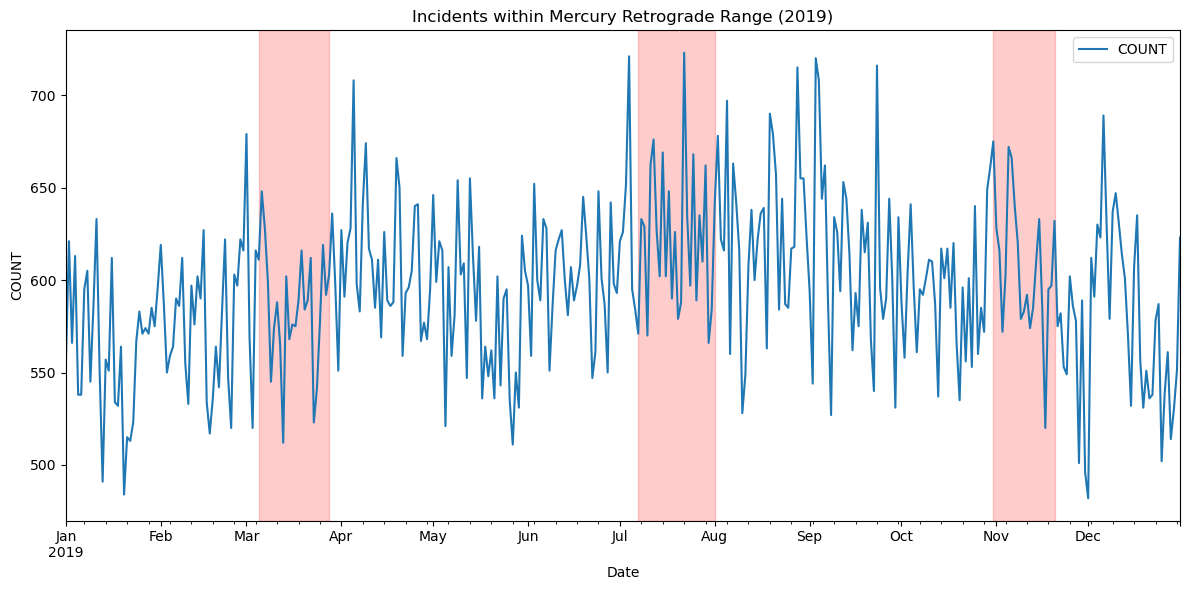

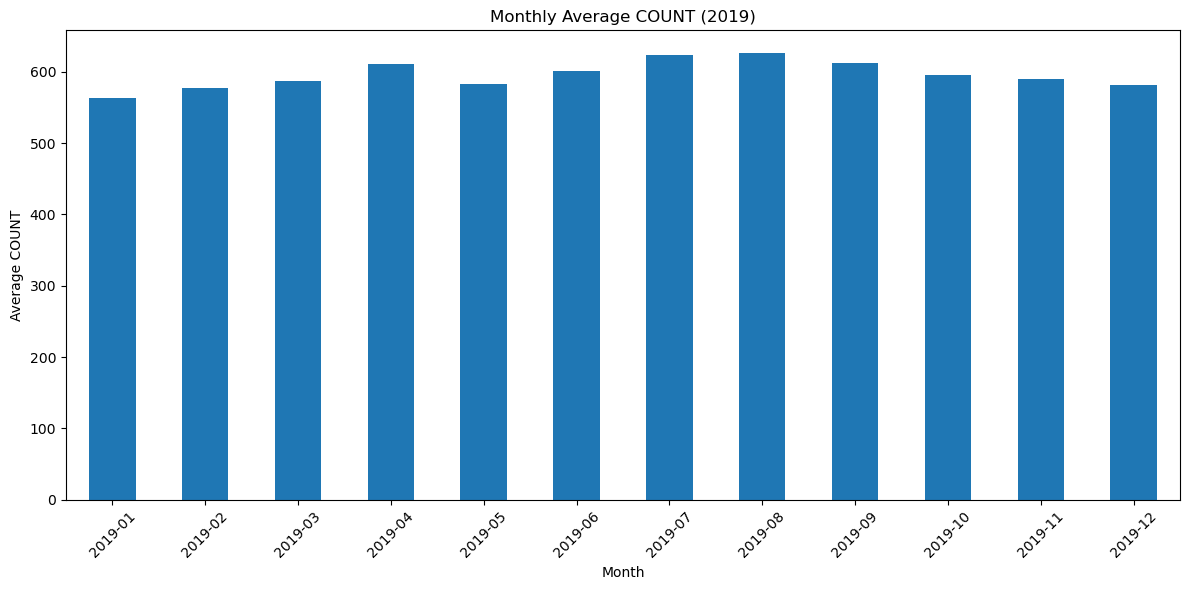

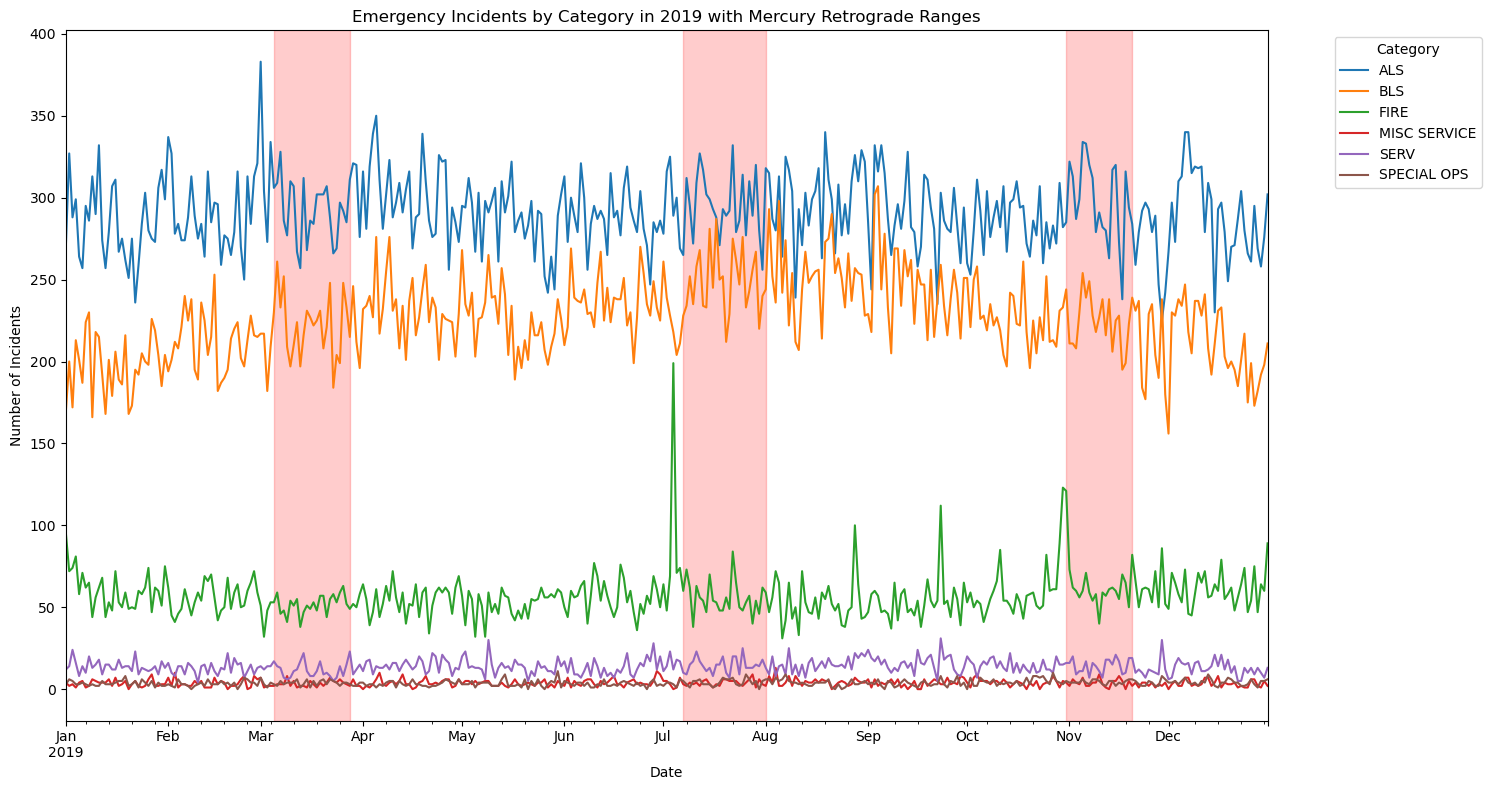

In [140]:
avg_in_range_2019, avg_out_range_2019, monthly_avg_2019 = analyze_incidents_by_year(2019, emergency_df, date_ranges)

#### 2020

Correlation for 2020: 0.2956

The reason for the supposed increase in correlation for this year is due to the fact that the Fourth of July occured within the retrograde window. The spike in incidents on the 4th is present in the other data sets, however the holiday does not fall within a retrograde window during those years. This inflated the correlation for 2020. 

Year 2020:
Average COUNT within date ranges: 622.62
Average COUNT outside date ranges: 584.66
Percentage Difference: 6.49%

Monthly averages:
month
2020-01    585.645161
2020-02    601.137931
2020-03    581.064516
2020-04    528.233333
2020-05    576.419355
2020-06    632.800000
2020-07    653.451613
2020-08    607.806452
2020-09    570.800000
2020-10    576.032258
2020-11    563.500000
2020-12    623.161290
Freq: M, Name: COUNT, dtype: float64


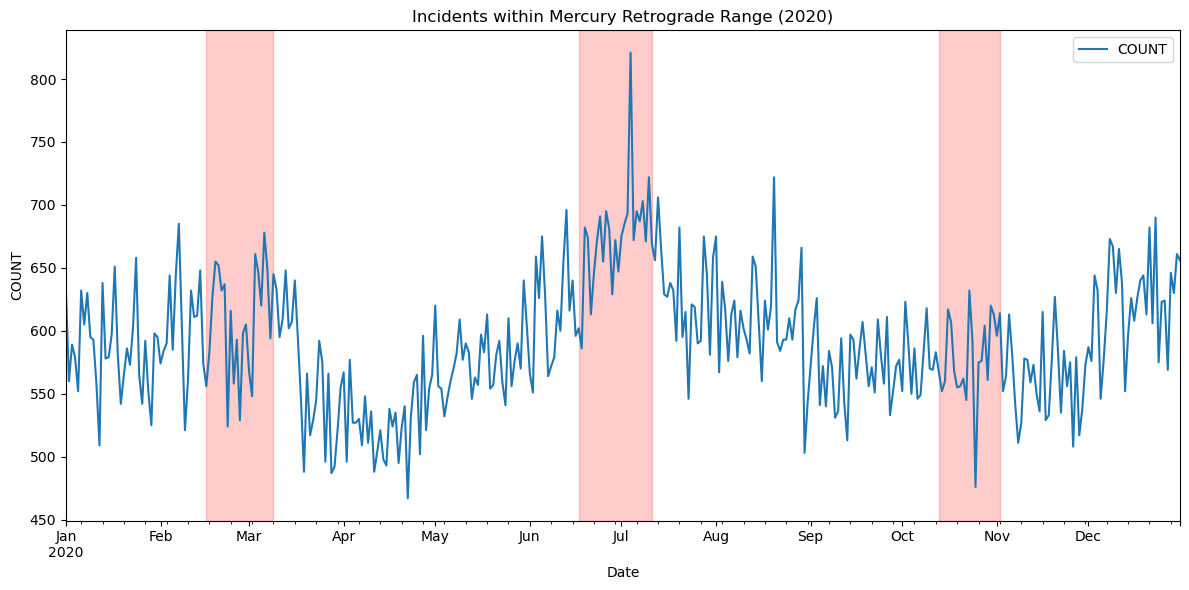

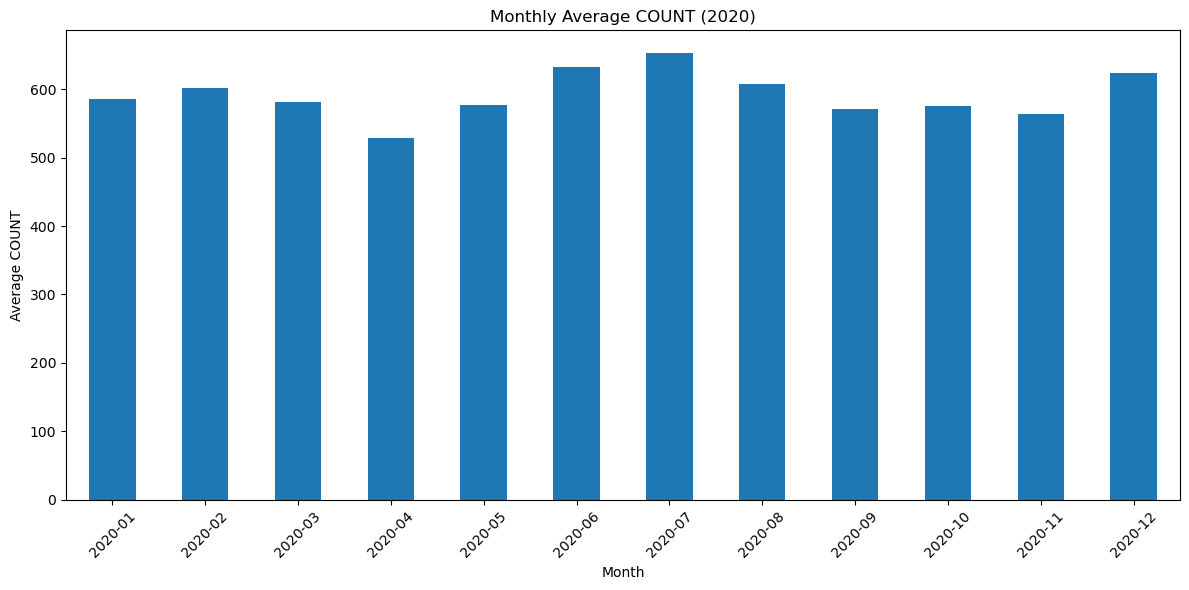

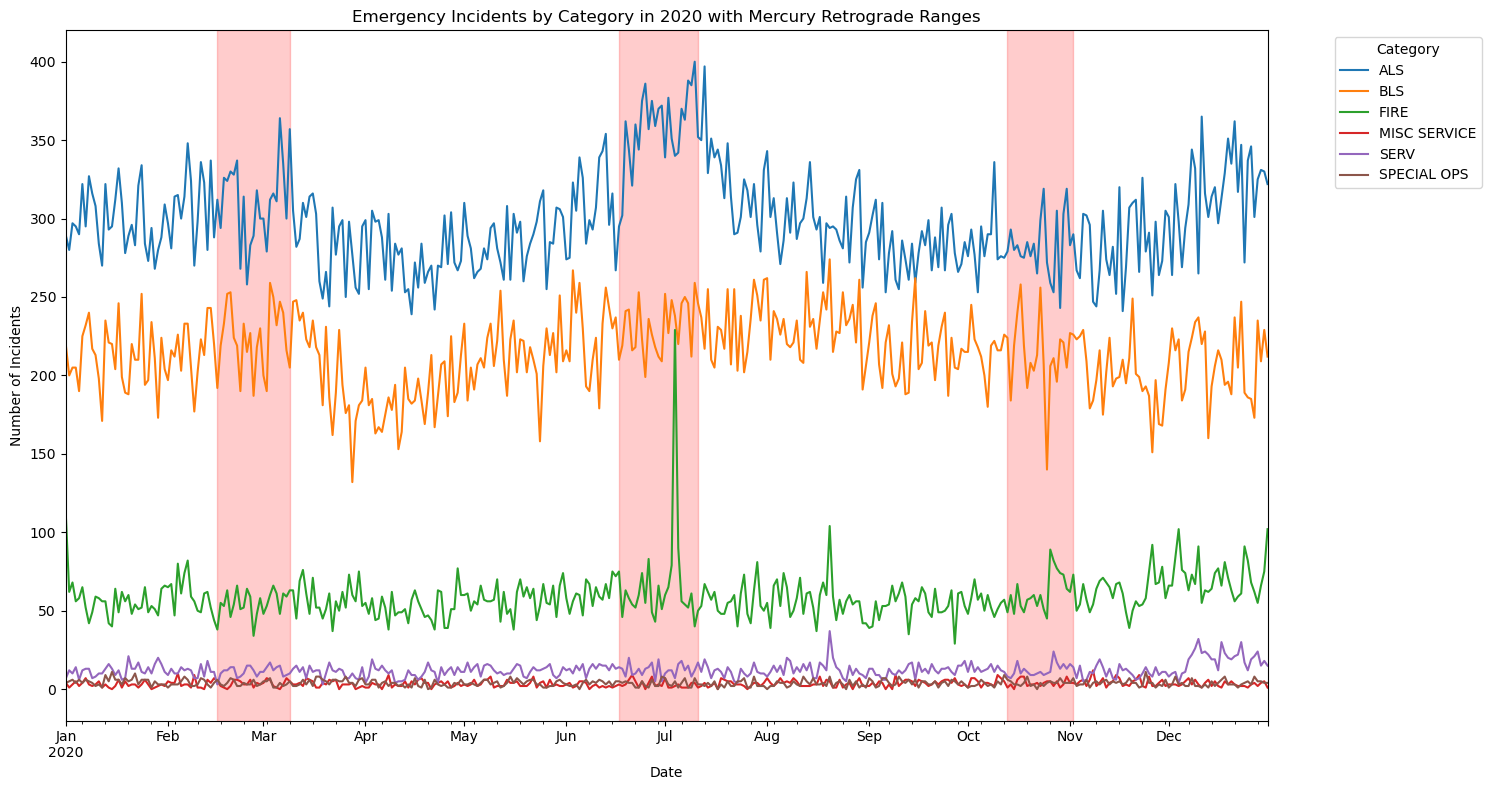

In [141]:
avg_in_range_2020, avg_out_range_2020, monthly_avg_2020 = analyze_incidents_by_year(2020, emergency_df, date_ranges)

In [142]:
# Filter the DataFrame for 2020
df_2020 = emergency_df[emergency_df['REPORTED'].dt.year == 2020]

# Group by date and count incidents
daily_incidents_2020 = df_2020.groupby(df_2020['REPORTED'].dt.date).size().reset_index(name='incident_count')

# Find the date with max incidents
max_incident_date = daily_incidents_2020.loc[daily_incidents_2020['incident_count'].idxmax(), 'REPORTED']

print(f"Date with maximum incidents in 2020: {max_incident_date.strftime('%Y-%m-%d')}")
print(f"Number of incidents: {daily_incidents_2020['incident_count'].max()}")


Date with maximum incidents in 2020: 2020-07-04
Number of incidents: 821


#### 2021

Year 2021:
Average COUNT within date ranges: 643.74
Average COUNT outside date ranges: 658.39
Percentage Difference: -2.23%

Monthly averages:
month
2021-01    629.129032
2021-02    589.071429
2021-03    593.806452
2021-04    640.800000
2021-05    647.935484
2021-06    677.733333
2021-07    676.032258
2021-08    708.000000
2021-09    699.233333
2021-10    656.161290
2021-11    672.166667
2021-12    672.677419
Freq: M, Name: COUNT, dtype: float64


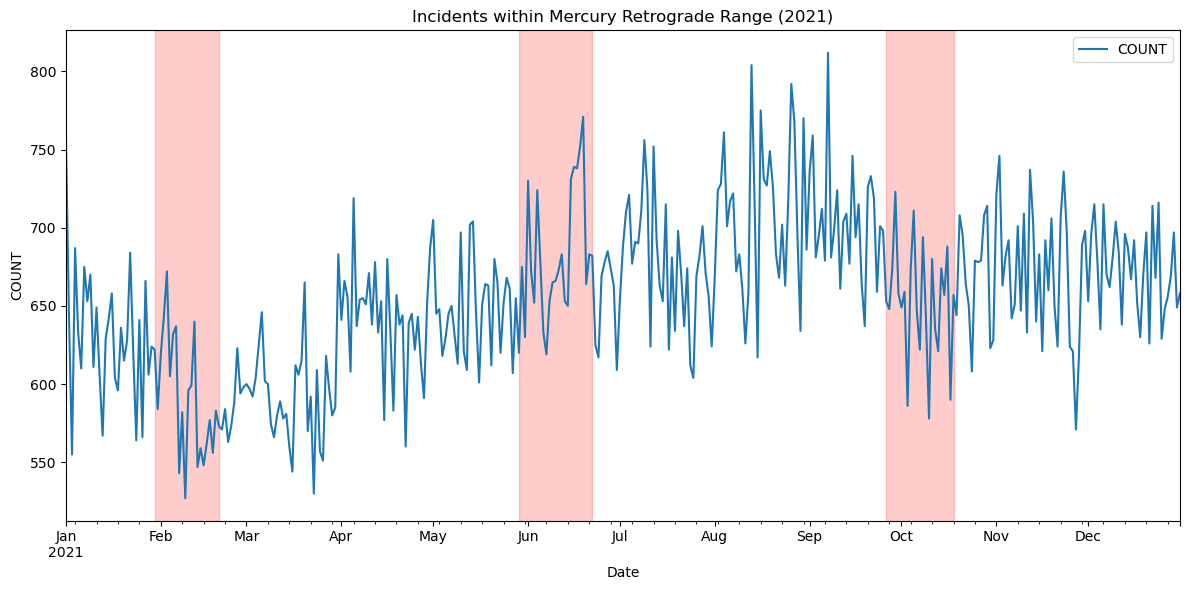

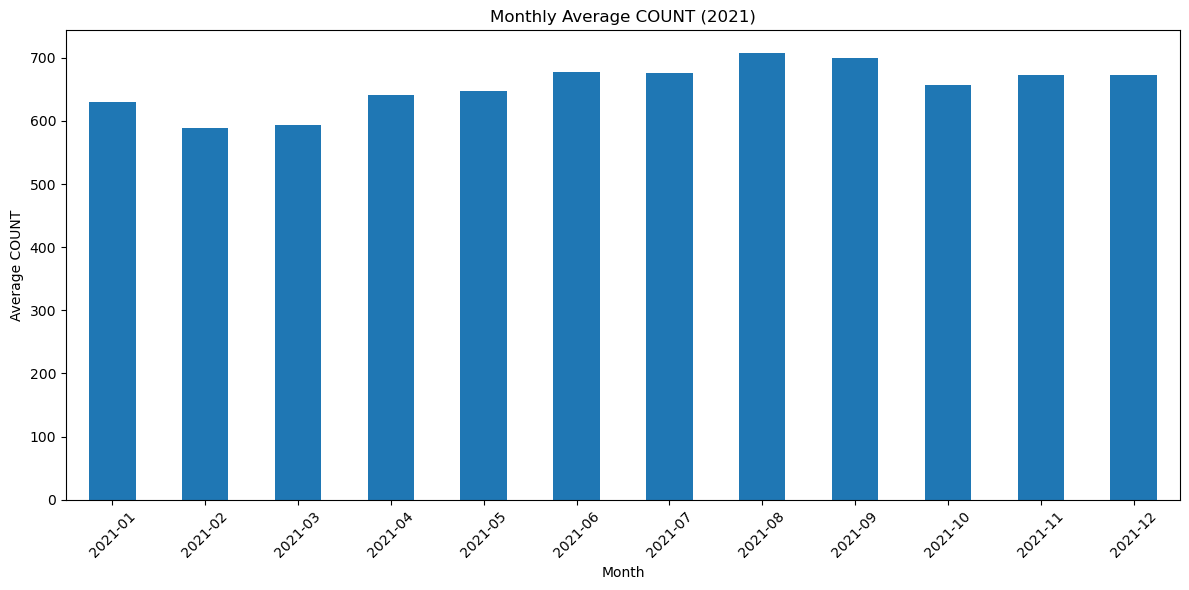

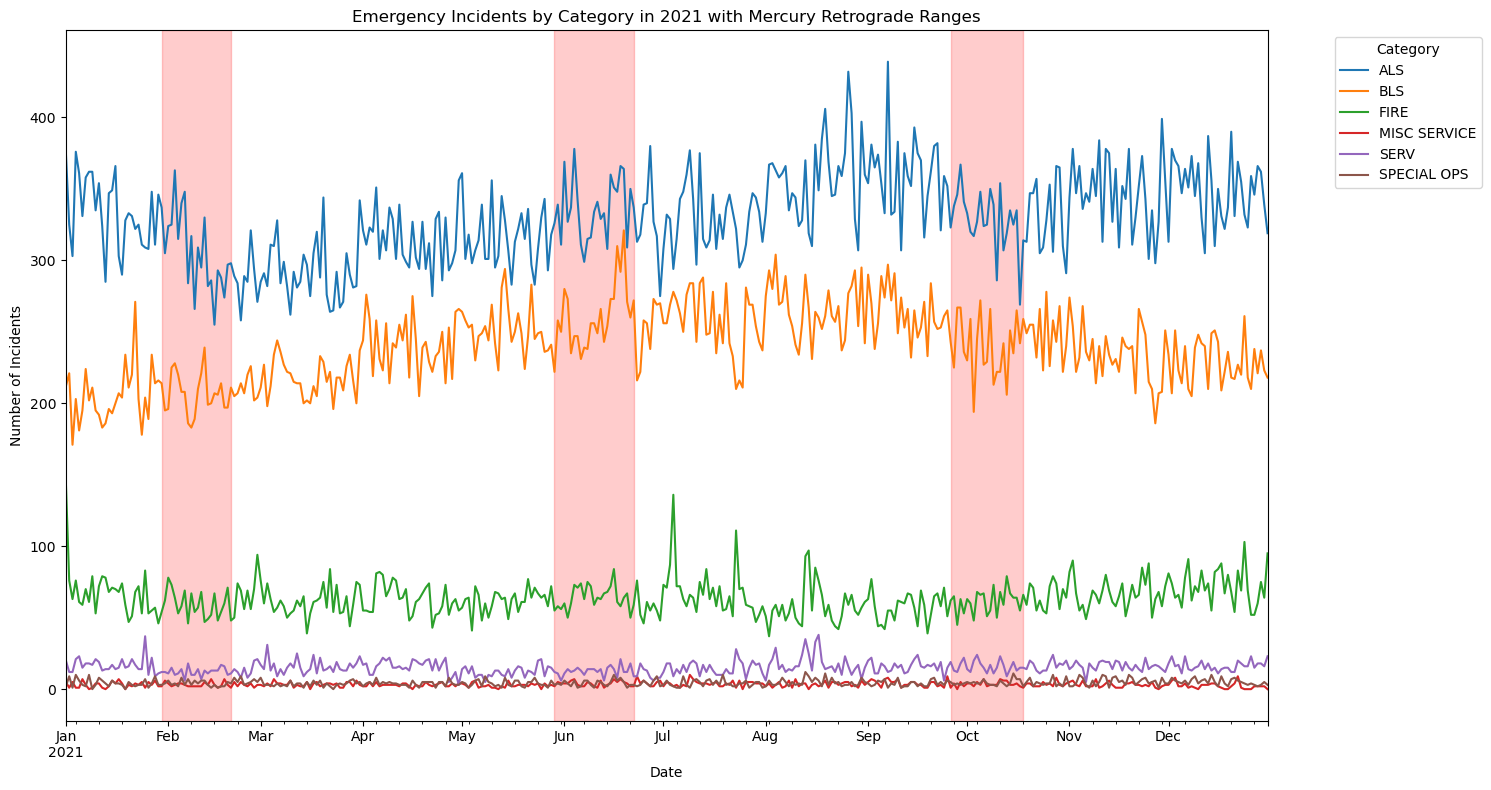

In [143]:
avg_in_range_2021, avg_out_range_2021, monthly_avg_2021 = analyze_incidents_by_year(2021, emergency_df, date_ranges)

#### 2022

Year 2022:
Average COUNT within date ranges: 677.38
Average COUNT outside date ranges: 677.82
Percentage Difference: -0.06%

Monthly averages:
month
2022-01    689.451613
2022-02    665.107143
2022-03    654.258065
2022-04    681.733333
2022-05    688.129032
2022-06    683.433333
2022-07    716.612903
2022-08    684.645161
2022-09    682.066667
2022-10    656.064516
2022-11    670.866667
2022-12    659.419355
Freq: M, Name: COUNT, dtype: float64


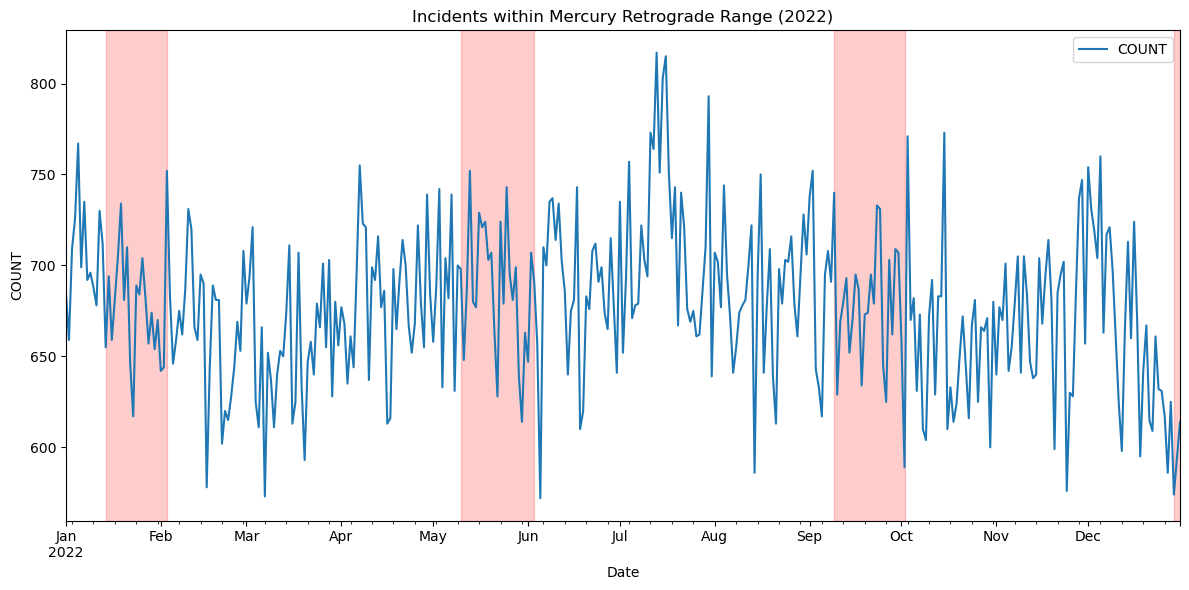

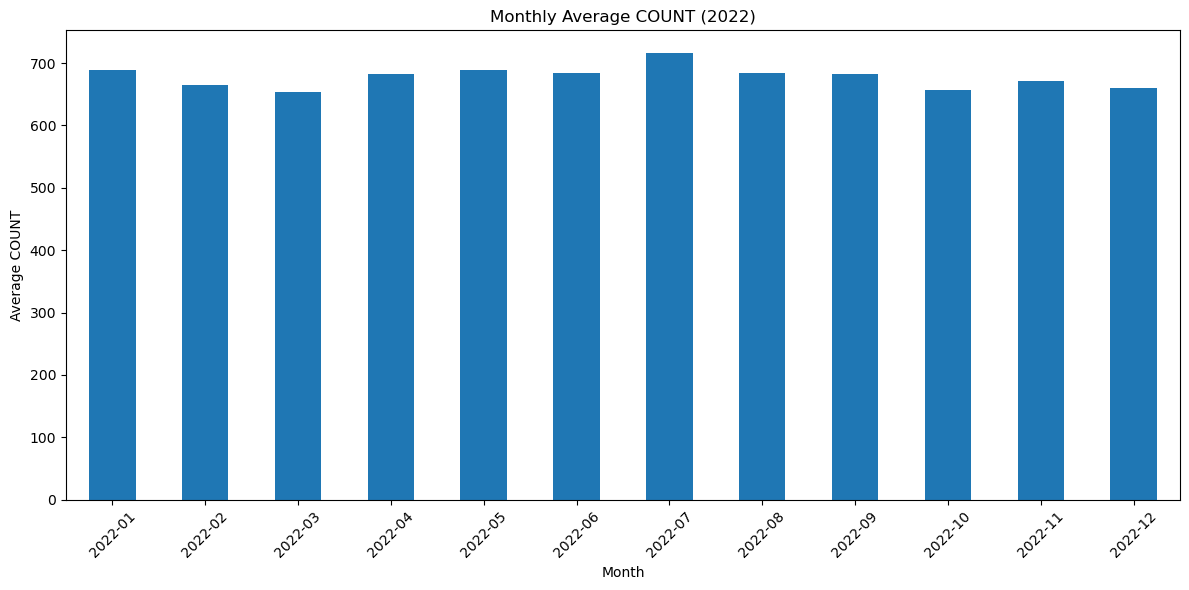

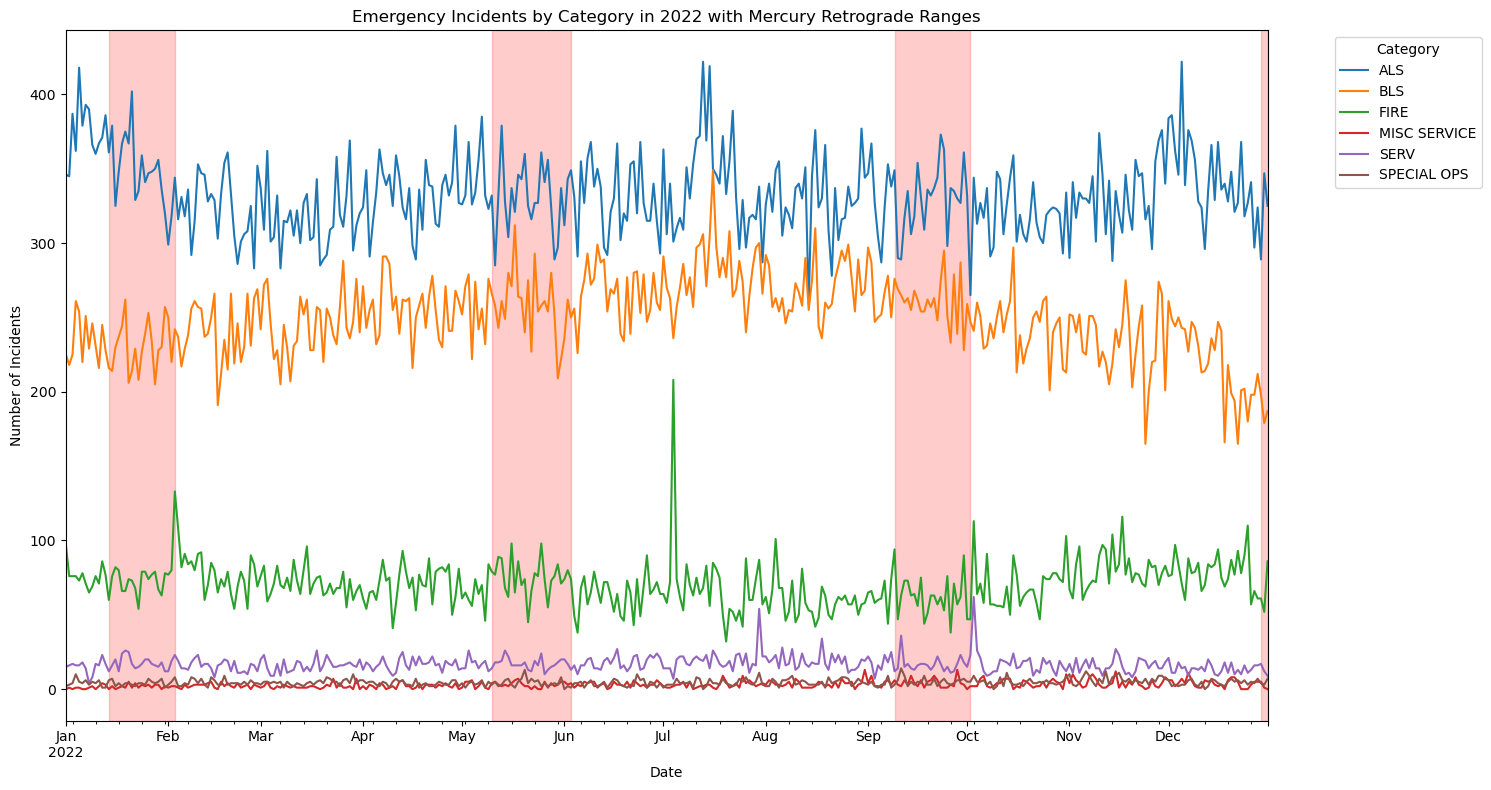

In [144]:
avg_in_range_2022, avg_out_range_2022, monthly_avg_2022 = analyze_incidents_by_year(2022, emergency_df, date_ranges)

#### 2023

Year 2023:
Average COUNT within date ranges: 624.65
Average COUNT outside date ranges: 630.15
Percentage Difference: -0.87%

Monthly averages:
month
2023-01    605.258065
2023-02    619.142857
2023-03    626.387097
2023-04    636.166667
2023-05    623.806452
2023-06    614.333333
2023-07    689.806452
2023-08    648.903226
2023-09    618.533333
2023-10    616.225806
2023-11    614.433333
2023-12    631.451613
Freq: M, Name: COUNT, dtype: float64


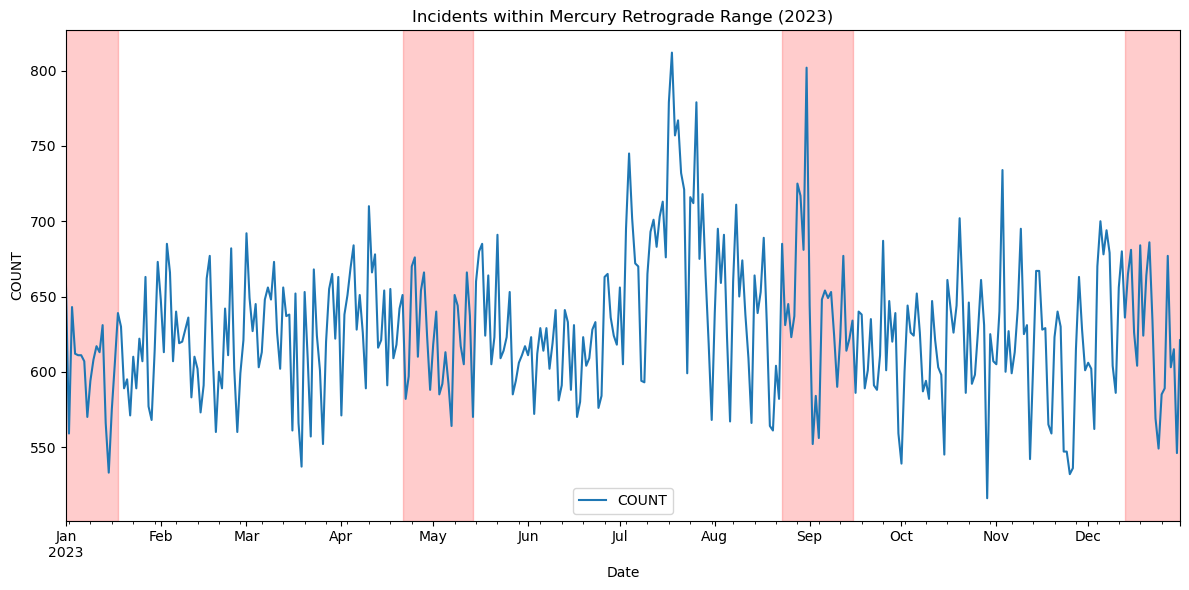

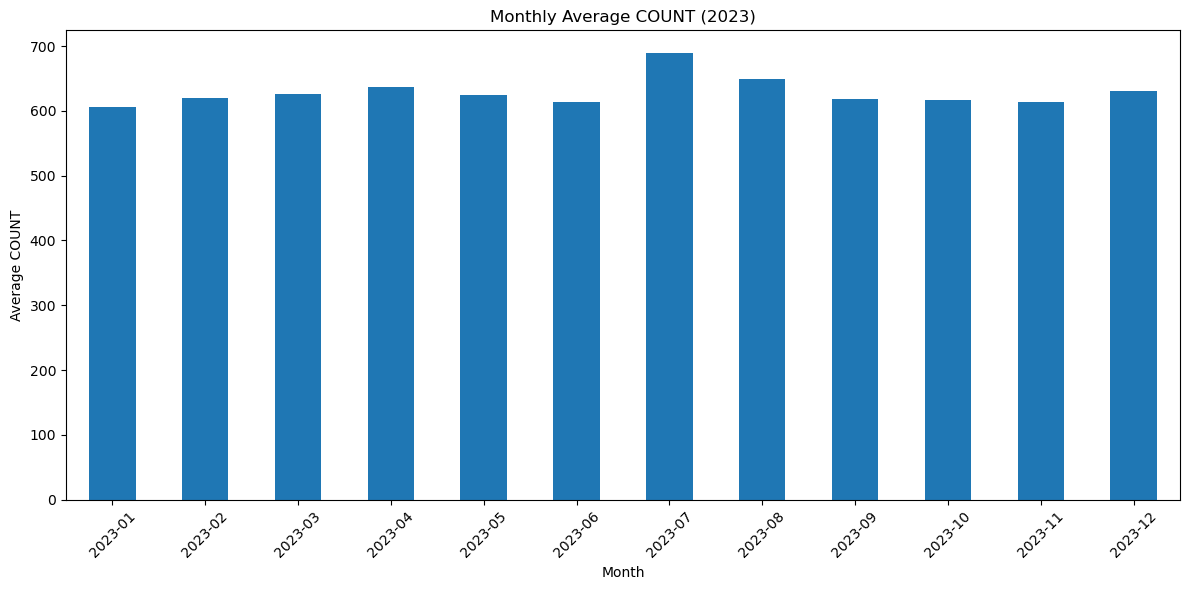

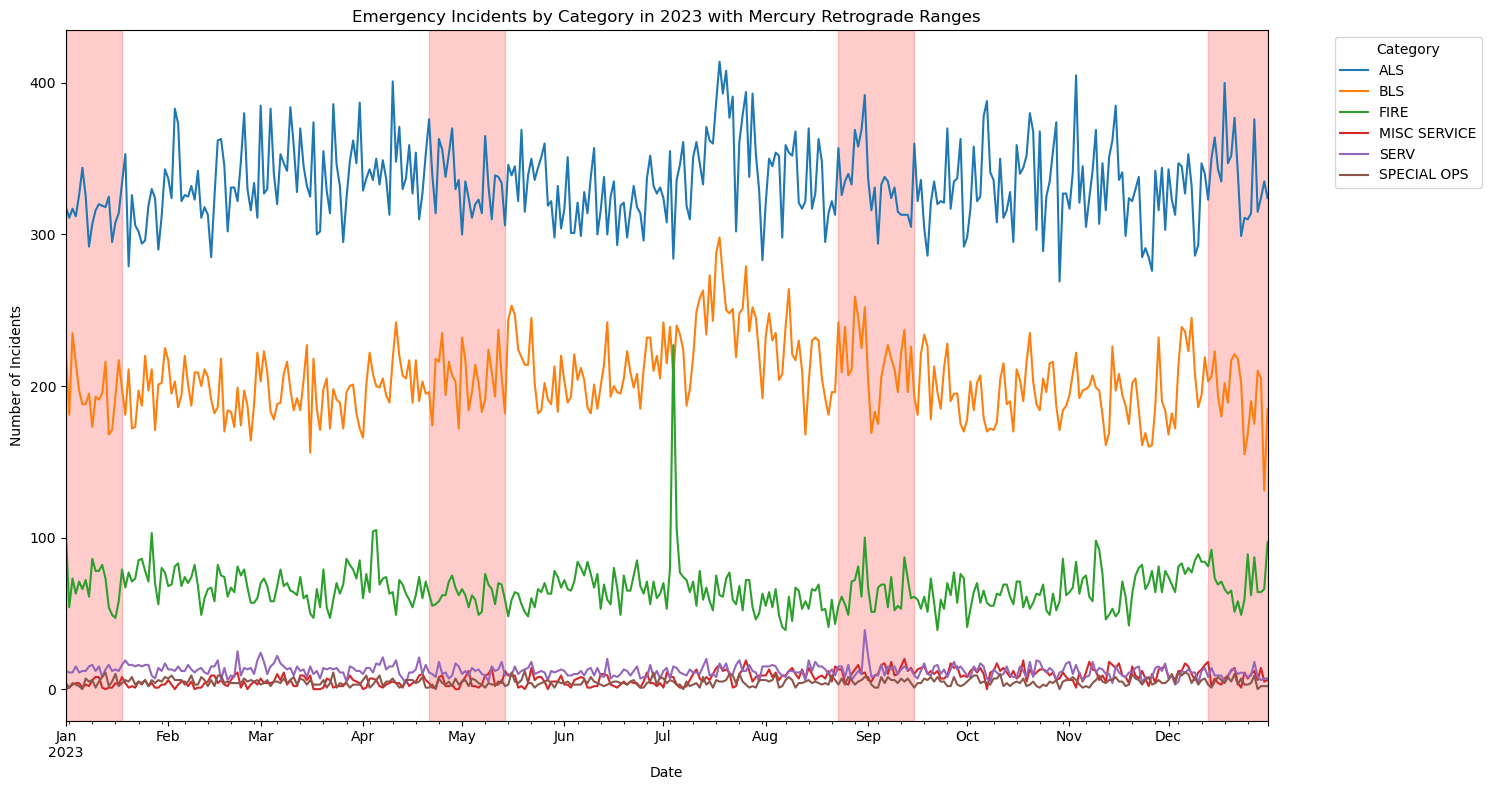

In [145]:
avg_in_range_2023, avg_out_range_2023, monthly_avg_2023 = analyze_incidents_by_year(2023, emergency_df, date_ranges)